<a href="https://colab.research.google.com/github/Player9397/Robotic-Perception/blob/main/Ashwin_S_Lab1_CP260_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CP260-2023:

Lab1: Understanding Image Metrology

You are given an image of a tetrahedron and a cuboid
on a standard A4 sheet of paper (20.8cm x 29.6cm)

You need to extract the length of the two objects
and the angle of the vertices at their faces.

You can assume that all sides of the cuboid and the tetrahedron are of the same length.

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [ ]:
# This package helps to download files from google drive
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#utility functions
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [ ]:
# download the image file from shared link on google drive
import gdown
#url = 'https://drive.google.com/uc?id=1o25MqsrYRyMDOQLOororNncEC3KMziqp'
url='https://drive.google.com/uc?id=1sSRLTmRcU_rlM2yFz2zLyDcATtojeHID'
#url='https://drive.google.com/uc?id=1frpq1lnyIEzSntbyGcjg4-7b4c0c59md'
output = 'Toys.jpg'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1sSRLTmRcU_rlM2yFz2zLyDcATtojeHID
To: /content/Toys.jpg
100%|██████████| 264k/264k [00:00<00:00, 46.0MB/s]


'Toys.jpg'

(2992, 2992, 3)


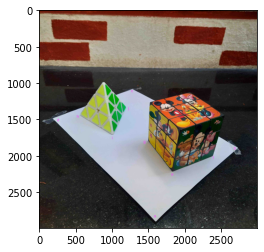

In [ ]:
img = cv.cvtColor(cv.imread('Toys.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

You now need to identify the pixel coordinates of the vertices
marked in the image.

You are free to use any tool.

One convenient tool is at 
 https://pixspy.com 

You can also download the same image from : 
https://drive.google.com/drive/folders/1LsoITE13tmyppPN7kwtE8uJCcRIqyu3_

In [ ]:
# Q1 Your answer here
# Find the coordinates of the points a-j and replace 'pass' 
# with your answers


###################
#YOUR CODE HERE

a=[1598,2907,1]
b=[2728,1890,1]
c=[1283,1084,1]
d=[190,1489,1]
e=[1832,2215,1]
f=[2385,2000,1]
g=[1499,1790,1]
h=[564,1440,1]
i=[1012,1706,1]
j=[1197,1337,1]


In [ ]:
#Q2: Find the 3x3 matrix H_up which will remove the projective distortion
#Determine the vanishing points and the  vanishing line and construct the 
#matrix

lab = np.cross(a, b)

###################
#YOUR CODE HERE
ldc = np.cross(d,c)
lad = np.cross(a,d)
lbc = np.cross(b,c)

#the points at which the line at infinity passes
p1 = np.cross(lab,ldc)
p2 = np.cross(lad,lbc)

#the vanishing line
l12 = np.cross(p1,p2)
l12 = l12/l12[2]
###################

print("The vanishing line is:",l12)

# Construct the matrix H_up for undoing projectivity
###################
#YOUR CODE HERE
H_up = np.eye(3)
H_up[2][0] = l12[0]
H_up[2][1] = l12[1]

print("\nH_up matrix is\n")
print(H_up)
###################

#check if it maps vanishing line to line at infinity
print("\nH_up maps the vanishing line to:",np.linalg.inv(H_up).T @ l12)

The vanishing line is: [-7.99876198e-05  1.48412472e-03  1.00000000e+00]

H_up matrix is

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-7.99876198e-05  1.48412472e-03  1.00000000e+00]]

H_up maps the vanishing line to: [0. 0. 1.]


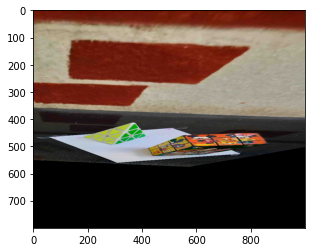

In [ ]:
#img_up = cv.warpPerspective(img,H_up ,dsize=(850,550))
img_up = cv.warpPerspective(img,H_up,dsize=(1000,800))
plt.imshow(img_up)

In [ ]:
#Q3: Now remove the affine distortion by finding two pairs of orthogonal lines
# and calculate the affine matrix
# First find the coordinates of the vertices after applying H_up

a_1 = H_up @ a

###################
#YOUR CODE HERE
b_1 = H_up @ b
d_1 = H_up @ d
c_1 = H_up @ c

# finding two sets of perpendicular lines 
l1 = np.cross(a_1,b_1)
m1 = np.cross(a_1,d_1)
l2 = np.cross(d_1,c_1)
m2 = np.cross(c_1,b_1)

row1 = np.array([ l1[0]*m1[0], l1[0]+m1[1] + l1[1]+m1[0]])
row2 = np.array([ l2[0]*m2[0], l2[0]+m2[1] + l2[1]+m2[0]])
aa = np.stack((row1, row2),axis=0)
bb = np.array([l1[1]*m1[1], l2[1]*m2[1]])
x_sol = np.linalg.solve(aa,bb.T)
H_ua1 = np.array([[x_sol[0],x_sol[1]],[x_sol[1],1]])
print(H_ua1)

[[-3.5512852e+01 -4.9363103e-12]
 [-4.9363103e-12  1.0000000e+00]]


In [ ]:
# Finding SVD to find the squareroot of K matrix where K = H_ua1 in this case
U, s, V = np.linalg.svd(H_ua1)
sv = np.zeros([2,2])
np.fill_diagonal(sv, np.sqrt(s),wrap=False)
A = np.dot(U,sv)
A = np.dot(A,U.T)
H_ua = np.eye(3)
H_ua[:2,:2] = A
H_ua = np.linalg.inv(H_ua)
print(H_ua)

[[ 1.67805899e-01 -1.12507462e-13  0.00000000e+00]
 [-1.12507462e-13  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


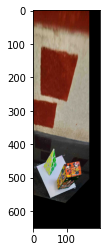

In [ ]:
# Do affine rectification
img_2 = cv.warpPerspective(img_up,H_ua ,dsize=(200,650))
plt.imshow(img_2)

In [ ]:
# defining functions to get the angle and length
def angle(v1,v2):
  v1 = v1/v1[2]
  v2 = v2/v2[2]
  cos_theta = ( v1[0]*v2[0] + v1[1]*v2[1] )/ (  math.sqrt(v1[0]**2 + v1[1]**2) * math.sqrt(v2[0]**2 + v2[1]**2) )
  return math.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

def len(x1,y1):
  A4_breadth = 29.6 # breadth of A4 sheet in cm
  a1 = H_ud @ a
  d1 = H_ud @ d
  x1=x1/x1[2]
  y1=y1/y1[2]
  a1=a1/a1[2]
  d1=d1/d1[2]
  return (math.dist(x1,y1)/math.dist(a1,d1))*A4_breadth

In [ ]:
#Q4: Now measure the angles and lenghts
# Since the image is left only with similarity transform
# angles and ratios of lenghts are preserved between the original
# plan of the paper and the image of the paper.

#mapping all the points till affine transformation
H_ud = H_ua @ H_up

a1 = H_ud @ a
#################
#YOUR CODE HERE

b1 = H_ud @ b
c1 = H_ud @ c
d1 = H_ud @ d
e1 = H_ud @ e
f1 = H_ud @ f
g1 = H_ud @ g
h1 = H_ud @ h
i1 = H_ud @ i
j1 = H_ud @ j

################
print("Angle of paper @ vertex a =",
      #YOUR CODE HERE,
      angle(np.cross(a1,b1), np.cross(a1,d1)) ,
      " degrees")

#YOUR CODE HERE

print("Angle  of tetrahedron face @ vertex i =",
      #YOUR CODE HERE,
      180 - angle( np.cross(i1,j1), np.cross(i1,h1)) ,
      " degrees")
print("Length of tetrahedron=",
      #YOUR CODE HERE, 
      len(i1,h1),
      "cm")

#YOUR CODE HERE


print("Angle of cube face @ vertex e =",
      #YOUR CODE HERE,
      angle(np.cross(e1,f1), np.cross(e1,g1)) ,
      " degrees")
print("Length of Cube=",
      #YOUR CODE HERE, 
      len(g1,e1),
      "cm")

Angle of paper @ vertex a = 90.0000000000302  degrees
Angle  of tetrahedron face @ vertex i = 65.84881679190067  degrees
Length of tetrahedron= 9.794086491613044 cm
Angle of cube face @ vertex e = 86.39679557851574  degrees
Length of Cube= 8.307072179236819 cm


Q5: List the possible sources of errors in the estimation
The angles are 90, 60, 90 for the paper tetrahedron and cuboid
respectively.
The lenghts are 9.9cm and 8.2cm for the tetrahedron and cuboid respectively.

#Write your answer here

Ans:: The errors in measurement can arise because the pixel coordinates that is picked initially and used for calculation is not exact, which can lead to error in calculation of transformation matrices and can lead to small variance in measurement each time.